Saving archive (4).zip to archive (4) (3).zip

Dataset Overview:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0

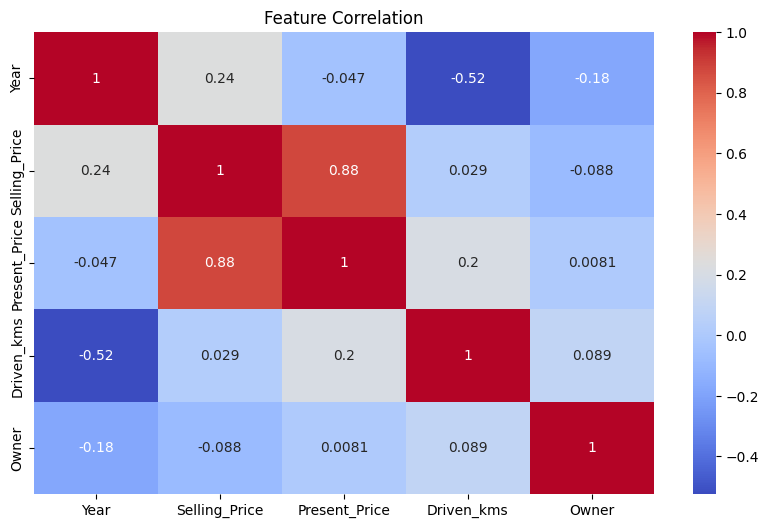


Model Performance:
Mean Squared Error: 0.7508551878688527
R-Squared: 0.9674045524129209


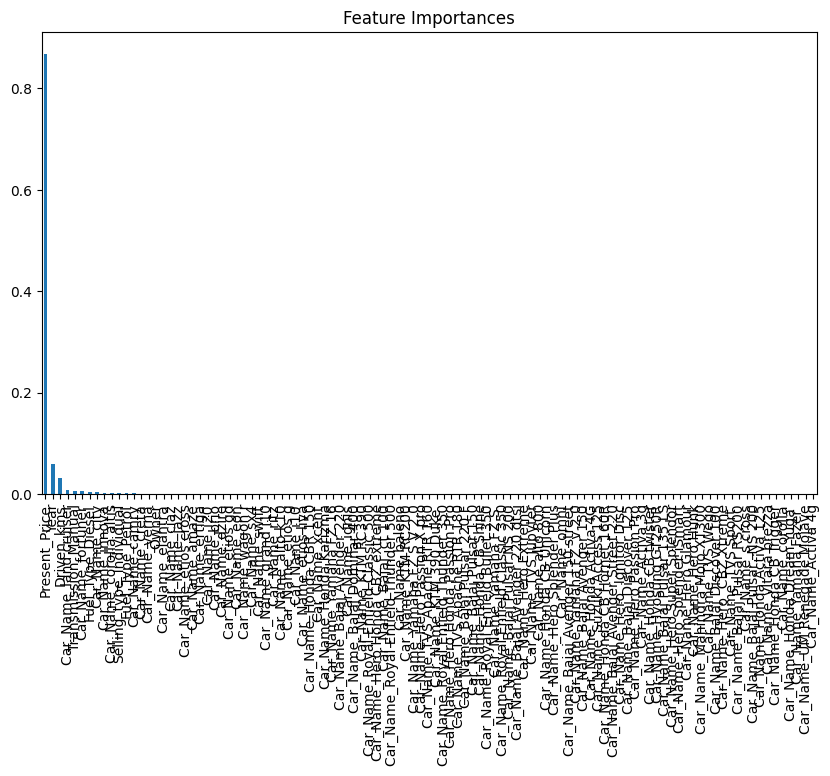

Trained model saved to /content/car_price_model.pkl


In [4]:
# Car Price Prediction using Machine Learning in Google Colab

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import files
uploaded = files.upload()

# Load the dataset
file_path = list(uploaded.keys())[0] # Get the name of the first uploaded file.
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("\nDataset Overview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Exploratory Data Analysis
print("\nDataset Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

# Visualize relationships between features and price
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Data Preprocessing
# Convert categorical columns to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Separate features (X) and target variable (y)
X = data.drop(['Selling_Price'], axis=1)
y = data['Selling_Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances")
plt.show()

# Save the trained model (optional)
import joblib
model_save_path = '/content/car_price_model.pkl'
joblib.dump(model, model_save_path)
print(f"Trained model saved to {model_save_path}")
